In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint
from sklearn.model_selection import train_test_split

In [11]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [12]:
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data # Features
y = data.target # target label
# Split the data into training /test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# Base rate with training labels
base_rate_training = sum(y_train == 0) / len(y_train)
# Base rate of the entire DS
labels = data.target
base_rate = sum(labels == 0) / len(labels)
print(f"base rate - from training set {base_rate_training}")
print(f"base_rate - from entire data set {base_rate}" )

########## Answer ###########
## Results presented show that the base rate in the training set differ slightly from the base rate in the entire data
## due to the random sampling process. However,the difference is relatively minor.


base rate - from training set 0.3802197802197802
base_rate - from entire data set 0.37258347978910367


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


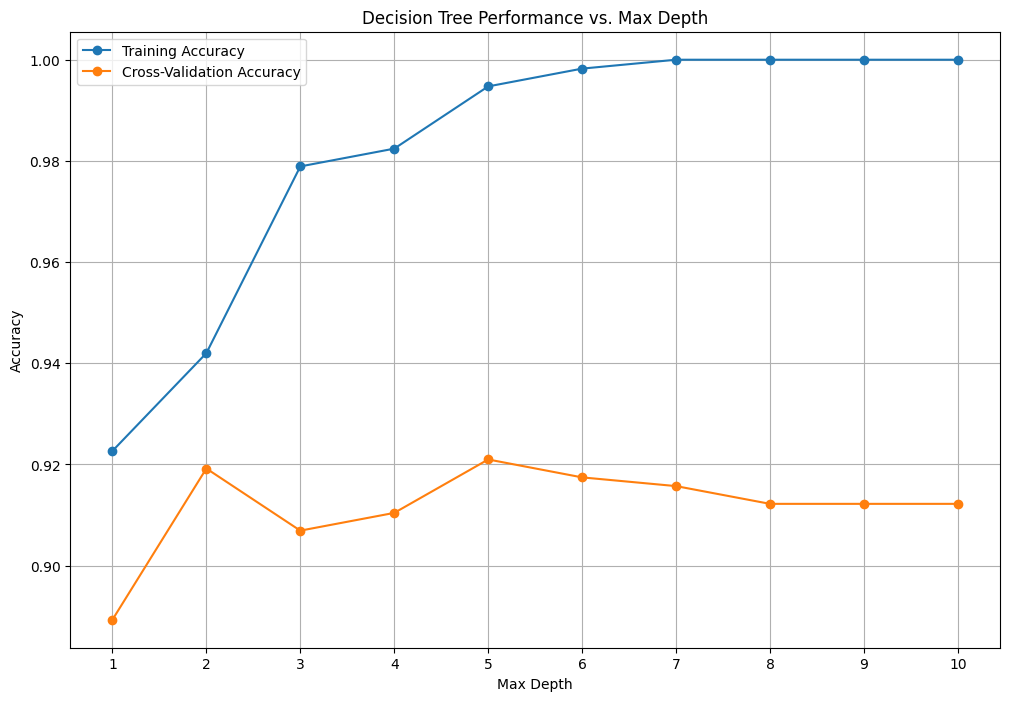

In [14]:
max_depths = np.arange(1, 11)
train_accuracies = []
cv_accuracies = []
for depth in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=10)
  clf.fit(X, y)# Calculate training accuracy
  train_acc = clf.score(X, y)
  train_accuracies.append(train_acc)
  cv_acc = cross_val_score(clf, X, y, cv=10).mean() # Calculate 10-fold cross-validated accuracy
  cv_accuracies.append(cv_acc)

plt.figure(figsize=(12, 8))
plt.plot(max_depths, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(max_depths, cv_accuracies, marker='o', label='Cross-Validation Accuracy')
plt.title('Decision Tree Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

In [15]:
best_train_acc = max(train_accuracies)
best_max_depths = [max_depths[i] for i, acc in enumerate(train_accuracies) if acc == best_train_acc]
print(best_train_acc)
print(best_max_depths)

1.0
[7, 8, 9, 10]


In [16]:
best_cv_acc = max(cv_accuracies)
best_max_depths_cv = [max_depths[i] for i, acc in enumerate(cv_accuracies) if acc == best_cv_acc]
print(best_cv_acc)
print(best_max_depths_cv)

0.9209899749373432
[5]


### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** <br>
*Best accuracy on the full dataset: 1* <br>
*Best max depth settings: 7, 8, 9, 10*

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** <br>
  *Best cross-validated accuracy: 0.9209899749373432* <br>
  *Best max depth setting for cross-validation: 5*

## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

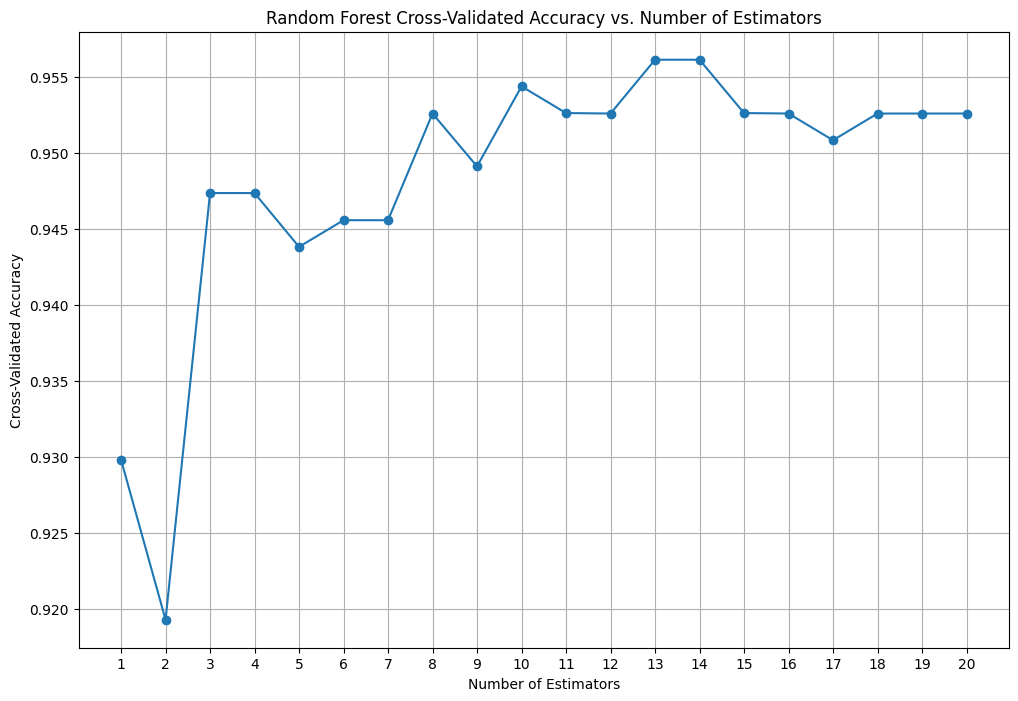

In [17]:
from sklearn.ensemble import RandomForestClassifier
max_depth = 5
n_estimators_values = np.arange(1, 21)
cv_accuracies = []
for n_estimators in n_estimators_values:
  clf = ensemble.RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=10)
  cv_acc = cross_val_score(clf, X, y, cv=10).mean()
  cv_accuracies.append(cv_acc)

plt.figure(figsize=(12, 8))
plt.plot(n_estimators_values, cv_accuracies, marker='o')
plt.title('Random Forest Cross-Validated Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(n_estimators_values)
plt.grid(True)
plt.show()

In [20]:
clf = ensemble.RandomForestClassifier(max_depth=max_depth, n_estimators=1, random_state=10)
cv_acc = cross_val_score(clf, X, y, cv=10).mean()
cv_accuracies.append(cv_acc)
print(cv_acc)

0.9298245614035088


### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:**

For the case of `n_estimators=1` as the result for a single tree the accuracy is 0.92982, similar to the cross-validated accuracy of the decision tree (0.92098997). However, when looking at the other estimators, the best accuracy is seen in 13 and 14 trees within the rainforest. <br>

In conclusion, there is an improvement using random forests vs. using a single tree.

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated accuracy? <br>
`n_estimators` values which gave highest cross-validated accuracy: 13 and 14

**Student answer here:**

### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

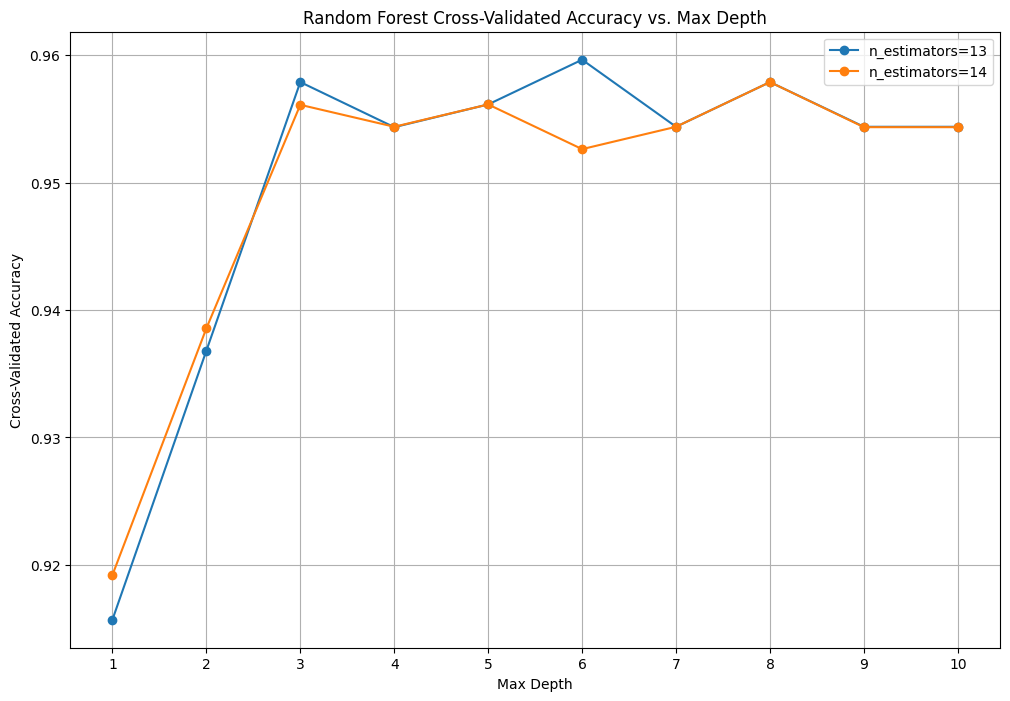

In [22]:
max_depths = np.arange(1, 11)
cv_accuracies_n13 = []
for depth in max_depths:
  clf = ensemble.RandomForestClassifier(max_depth=depth, n_estimators=13, random_state=10)
  cv_acc13 = cross_val_score(clf, X, y, cv=10).mean()
  cv_accuracies_n13.append(cv_acc13)

cv_accuracies_n14 = []
for depth in max_depths:
  clf = ensemble.RandomForestClassifier(max_depth=depth, n_estimators=14, random_state=10)
  cv_acc14 = cross_val_score(clf, X, y, cv=10).mean()
  cv_accuracies_n14.append(cv_acc14)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(max_depths, cv_accuracies_n13, marker='o', label='n_estimators=13')
plt.plot(max_depths, cv_accuracies_n14, marker='o', label='n_estimators=14')
plt.title('Random Forest Cross-Validated Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

In [23]:
best_cv_acc13 = max(cv_accuracies_n13)
best_max_depths_cv13 = [max_depths[i] for i, acc in enumerate(cv_accuracies_n13) if acc == best_cv_acc13]
print(best_cv_acc13)
print(best_max_depths_cv13)

0.9596491228070176
[6]


In [24]:
best_cv_acc14 = max(cv_accuracies_n14)
best_max_depths_cv14 = [max_depths[i] for i, acc in enumerate(cv_accuracies_n14) if acc == best_cv_acc14]
print(best_cv_acc14)
print(best_max_depths_cv14)

0.9578947368421054
[8]


### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:**

Best cross-validated accuracy 2(b)ii: 0.9209899749373432 , max_depth= 5

Random Forest Cross-Validated Accuracy when n_estimators= 13: 0.9596491228070176 , max_depth= 6

Random Forest Cross-Validated Accuracy when n_estimators= 14: 0.9578947368421054 , max_depth= 8

So the new optimal setting of max_depth is 6, where the accuracy is almost 0.96
However, multiple settings achieve the best accuracy. In this case, the accuracy for both n_estimators (13,14) is very close so you can choose a depth of 6 or 8. **

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

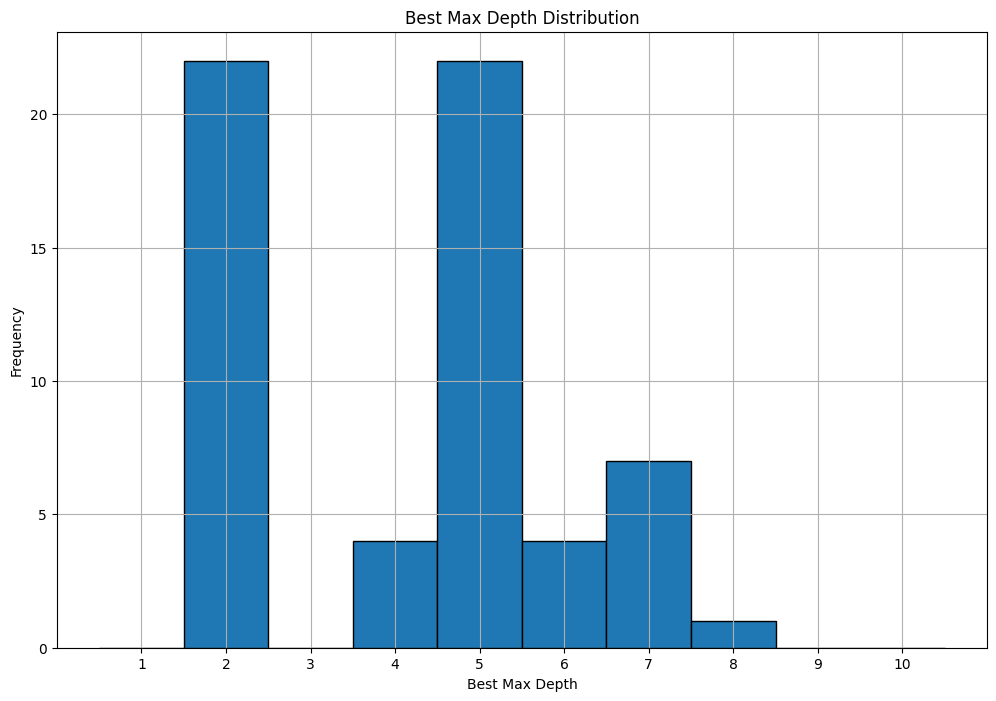

In [25]:
#Random state values from 0 to 59 for debugging:
random_state_values = np.arange(60)
max_depths = np.arange(1, 11)
best_max_depths = {}
for random_state in random_state_values:
  best_accuracy = 0
  best_depth = None
  for depth in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=random_state)
    cv_acc = cross_val_score(clf, X, y, cv=10).mean()
    if cv_acc > best_accuracy: # Update max_depth if a higher accuracy is achieved
      best_accuracy = cv_acc
      best_depth = depth
  best_max_depths[random_state] = best_depth
  best_depths_list = list(best_max_depths.values())
plt.figure(figsize=(12, 8))
plt.hist(best_depths_list, bins=np.arange(1, 12) - 0.5, edgecolor='black')
plt.title('Best Max Depth Distribution')
plt.xlabel('Best Max Depth')
plt.ylabel('Frequency')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

In [26]:
for random_state, best_depth in best_max_depths.items():
  print(f"random_state {random_state}: best_max_depth {best_depth}")

random_state 0: best_max_depth 5
random_state 1: best_max_depth 5
random_state 2: best_max_depth 2
random_state 3: best_max_depth 5
random_state 4: best_max_depth 2
random_state 5: best_max_depth 5
random_state 6: best_max_depth 2
random_state 7: best_max_depth 2
random_state 8: best_max_depth 2
random_state 9: best_max_depth 2
random_state 10: best_max_depth 5
random_state 11: best_max_depth 2
random_state 12: best_max_depth 5
random_state 13: best_max_depth 2
random_state 14: best_max_depth 2
random_state 15: best_max_depth 7
random_state 16: best_max_depth 4
random_state 17: best_max_depth 5
random_state 18: best_max_depth 2
random_state 19: best_max_depth 4
random_state 20: best_max_depth 5
random_state 21: best_max_depth 2
random_state 22: best_max_depth 2
random_state 23: best_max_depth 5
random_state 24: best_max_depth 2
random_state 25: best_max_depth 4
random_state 26: best_max_depth 8
random_state 27: best_max_depth 2
random_state 28: best_max_depth 5
random_state 29: best_ma

### (b)
What are the top two most frequent parameter settings?

**Student answer here:**

Top 2 most frequent parameters setting are 2 and 5